# TP2 ANN

## Importation des librairies

In [5]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn import neighbors, model_selection
import time


## Importation du jeu de données

In [6]:
mnist = fetch_openml('mnist_784') 

In [4]:
len(mnist.data)

70000

In [12]:
# on prend 70% du dataset de 70 000 (49000) pour le training set
xtrain, xtest, ytrain, ytest =  model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=50)

In [9]:
# entraînement du réseau de neurones 
mlp.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Calcul de la précision (1ère méthode)

In [10]:
#score sur le jeu de test, précision de 0.9489
mlp.score(xtest,ytest)

0.9452380952380952

## Calcul de la précision (2ème méthode)

In [11]:
print("valeur prédite : ",mlp.predict(xtest[3].reshape(1,-1)))
print("valeur réelle : ",ytest[3])

valeur prédite :  ['8']
valeur réelle :  8


In [12]:
predict = mlp.predict(xtest)

In [13]:
precision_score(ytest,predict,average='micro')

0.9452380952380952

## Variation du nombre de couches du réseau

In [25]:
# Initialisation des classifier (2,10,20,50,100 couches de 50 neurones)
mlp2 = MLPClassifier(hidden_layer_sizes=(50,50))
mlp10 = MLPClassifier(hidden_layer_sizes= tuple([50]*10))
mlp20 = MLPClassifier(hidden_layer_sizes= tuple([50]*20))
mlp50 = MLPClassifier(hidden_layer_sizes=tuple([50]*50))
mlp100 = MLPClassifier(hidden_layer_sizes=tuple([50]*100))

In [38]:
time_nb =[]
# entraînement des réseaux
sec_avant = time.time()
mlp2.fit(xtrain,ytrain)
time_nb.append(time.time()-sec_avant)

sec_avant = time.time()
mlp10.fit(xtrain,ytrain)
time_nb.append(time.time()-sec_avant)

sec_avant = time.time()
mlp20.fit(xtrain,ytrain)
time_nb.append(time.time()-sec_avant)

sec_avant = time.time()
mlp50.fit(xtrain,ytrain)
time_nb.append(time.time()-sec_avant)

sec_avant = time.time()
mlp100.fit(xtrain,ytrain)
time_nb.append(time.time()-sec_avant)

0.9719523809523809
0.9665714285714285


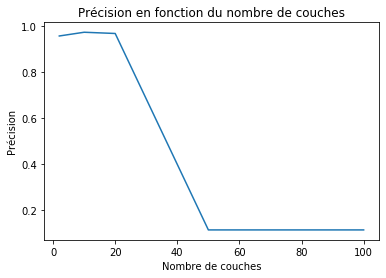

In [43]:
liste_score = [mlp2.score(xtest,ytest),mlp10.score(xtest,ytest),mlp20.score(xtest,ytest),mlp50.score(xtest,ytest),mlp100.score(xtest,ytest)]
liste_score2 = [mlp2.score(xtrain,ytrain),mlp10.score(xtrain,ytrain),mlp20.score(xtrain,ytrain),mlp50.score(xtrain,ytrain),mlp100.score(xtrain,ytrain)]
plt.plot([2,10,20,50,100],liste_score,label="Jeu de test")
#plt.plot([2,10,20,50,100],liste_score2,label="Jeu d'entraînement")
print(mlp10.score(xtest,ytest))
print(mlp20.score(xtest,ytest))
plt.xlabel("Nombre de couches")
plt.ylabel("Précision")
plt.title("Précision en fonction du nombre de couches")
plt.show()

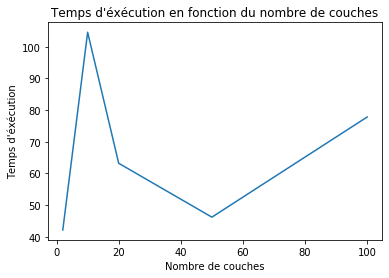

In [41]:

plt.plot([2,10,20,50,100],time_nb)
plt.xlabel("Nombre de couches")
plt.ylabel("Temps d'apprentissage")
plt.title("Temps d'éxécution en fonction du nombre de couches")
plt.show()

## Variation du nombre de neurones par couches

### 1er modèle : 50 couche de 60 à 11 neurones

In [34]:
lst1 = []
for i in range(60,10,-1):
    lst1.append(i)
tuple1 = tuple(lst1)    
mlp_B50 = MLPClassifier(hidden_layer_sizes=(tuple1))
sec_avant = time.time()
mlp_B50.fit(xtrain,ytrain)                  
print("temps de calcul :",time.time()-sec_avant)
                            

temps de calcul : 60.53572750091553


### 2ème modèle : 20 couches de 60 à 11 neurones

In [8]:
lst2 = []
for i in range(60,32,-3):
    lst2.append(i)
for i in range(31,10,-2):
    lst2.append(i)
tuple2 = tuple(lst2)
print(tuple2)

(60, 57, 54, 51, 48, 45, 42, 39, 36, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11)


In [32]:


mlp_B20 = MLPClassifier(hidden_layer_sizes=(tuple2))
sec_avant = time.time()
mlp_B20.fit(xtrain,ytrain)                  
print("temps de calcul :",time.time()-sec_avant)



temps de calcul : 89.6930615901947


In [33]:
print("score pour le 1er modèle :", mlp_B50.score(xtest,ytest))
print("score pour le 2ème modèle :",mlp_B20.score(xtest,ytest))

score pour le 1er modèle : 0.11385714285714285
score pour le 2ème modèle : 0.9707142857142858


## Test des différents solveur sur les 2 modèles précédents

In [21]:
#initialisation des différents réseaux en fonction des solveur/modèles
mlp_20ad = MLPClassifier(solver='adam',hidden_layer_sizes=(tuple2))
#mlp_50ad = MLPClassifier(solver='adam',hidden_layer_sizes=(tuple1))
mlp_20lb = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(tuple2))
#mlp_50lb = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(tuple1))
mlp_20sgd = MLPClassifier(solver='sgd',hidden_layer_sizes=(tuple2))
#mlp_50sgd= MLPClassifier(solver='sgd',hidden_layer_sizes=(tuple1))

In [22]:
time_20 =[]


temp = time.time()
mlp_20ad.fit(xtrain,ytrain)                  
time_20.append(time.time()-temp)

temp = time.time()
mlp_20lb.fit(xtrain,ytrain)                  
time_20.append(time.time()-temp)

temp = time.time()
mlp_20sgd.fit(xtrain,ytrain)                  
time_20.append(time.time()-temp)



In [11]:

time_50 =[]

temp = time.time()
mlp_50ad.fit(xtrain,ytrain)                  
time_50.append(time.time()-temp)

#2ème solveur


temp = time.time()
mlp_50lb.fit(xtrain,ytrain)                  a
time_50.append(time.time()-temp) 

#3ème solveur

temp = time.time()
mlp_50sgd.fit(xtrain,ytrain)                  
time_50.append(time.time()-temp)


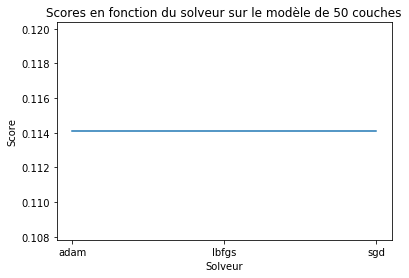

In [12]:
liste_score50 = [mlp_50ad.score(xtest,ytest),mlp_50lb.score(xtest,ytest),mlp_50sgd.score(xtest,ytest)]
plt.plot(['adam','lbfgs','sgd'],liste_score50)
plt.xlabel("Solveur")
plt.ylabel("Score")
plt.title("Scores en fonction du solveur sur le modèle de 50 couches")
plt.show()

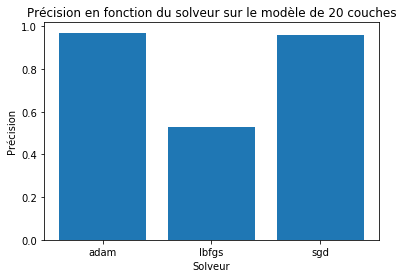

In [24]:
liste_score20 = [mlp_20ad.score(xtest,ytest),mlp_20lb.score(xtest,ytest),mlp_20sgd.score(xtest,ytest)]
plt.bar(['adam','lbfgs','sgd'],liste_score20)
plt.xlabel("Solveur")
plt.ylabel("Précision")
plt.title("Précision en fonction du solveur sur le modèle de 20 couches")
plt.show()

In [27]:
"""
plt.plot(['adam','lbfgs','sgd'],time_50)
plt.xlabel("Solveur")
plt.ylabel("Temps d'éxécution (sec)")
plt.title("Temps d'éxécution en fonction du solveur sur le modèle de 50 couches")
plt.show()"""

'\nplt.plot([\'adam\',\'lbfgs\',\'sgd\'],time_50)\nplt.xlabel("Solveur")\nplt.ylabel("Temps d\'éxécution (sec)")\nplt.title("Temps d\'éxécution en fonction du solveur sur le modèle de 50 couches")\nplt.show()'

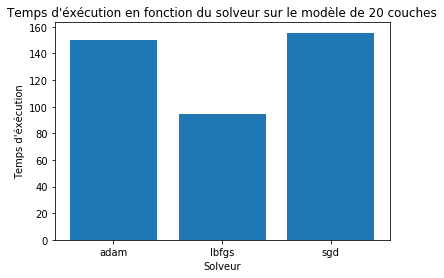

In [26]:

plt.bar(['adam','lbfgs','sgd'],time_20)
plt.xlabel("Solveur")
plt.ylabel("Temps d'éxécution")
plt.title("Temps d'éxécution en fonction du solveur sur le modèle de 20 couches")
plt.show()

## Variation de la fonction d'activation

In [15]:
mlp_20id = MLPClassifier(hidden_layer_sizes=(tuple2),activation ='identity')
mlp_20log = MLPClassifier(hidden_layer_sizes=(tuple2),activation ='logistic')
mlp_20tan = MLPClassifier(hidden_layer_sizes=(tuple2),activation ='tanh')
mlp_20relu = MLPClassifier(hidden_layer_sizes=(tuple2),activation ='relu')

time_act =[]

temp = time.time()
mlp_20id.fit(xtrain,ytrain)                  
time_act.append(time.time()-temp)

temp = time.time()
mlp_20log.fit(xtrain,ytrain)                  
time_act.append(time.time()-temp)

temp = time.time()
mlp_20tan.fit(xtrain,ytrain)                  
time_act.append(time.time()-temp)

temp = time.time()
mlp_20relu.fit(xtrain,ytrain)                  
time_act.append(time.time()-temp)

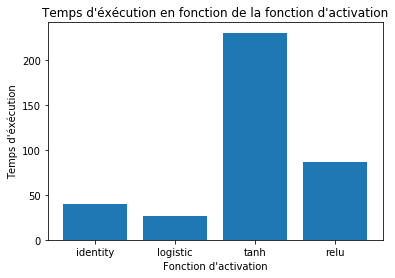

In [17]:

plt.bar(['identity','logistic','tanh','relu'],time_act)
plt.xlabel("Fonction d'activation")
plt.ylabel("Temps d'éxécution")
plt.title("Temps d'éxécution en fonction de la fonction d'activation")
plt.show()

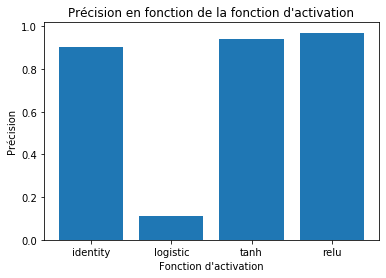

In [18]:
score_act = [mlp_20id.score(xtest,ytest),mlp_20log.score(xtest,ytest),mlp_20tan.score(xtest,ytest),mlp_20relu.score(xtest,ytest)]
plt.bar(['identity','logistic','tanh','relu'],score_act)
plt.xlabel("Fonction d'activation")
plt.ylabel("Précision")
plt.title("Précision en fonction de la fonction d'activation")
plt.show()

## Variation la régularisation L2 (alpha)

In [8]:
mlp_20_1 = MLPClassifier(hidden_layer_sizes=(tuple2),alpha=10**(-1))
mlp_20_2 = MLPClassifier(hidden_layer_sizes=(tuple2),alpha=10**(-2))
mlp_20_3 = MLPClassifier(hidden_layer_sizes=(tuple2),alpha=10**(-3))
mlp_20_4 = MLPClassifier(hidden_layer_sizes=(tuple2),alpha=10**(-4))
mlp_20_5 = MLPClassifier(hidden_layer_sizes=(tuple2),alpha=10**(-5))
mlp_20_6 = MLPClassifier(hidden_layer_sizes=(tuple2),alpha=10**(-6))

In [9]:
time_alph =[]

temp = time.time()
mlp_20_1.fit(xtrain,ytrain)                  
time_alph.append(time.time()-temp)

temp = time.time()
mlp_20_2.fit(xtrain,ytrain)                  
time_alph.append(time.time()-temp)

temp = time.time()
mlp_20_3.fit(xtrain,ytrain)                  
time_alph.append(time.time()-temp)

temp = time.time()
mlp_20_4.fit(xtrain,ytrain)                  
time_alph.append(time.time()-temp)

temp = time.time()
mlp_20_5.fit(xtrain,ytrain)                  
time_alph.append(time.time()-temp)

temp = time.time()
mlp_20_6.fit(xtrain,ytrain)                  
time_alph.append(time.time()-temp)


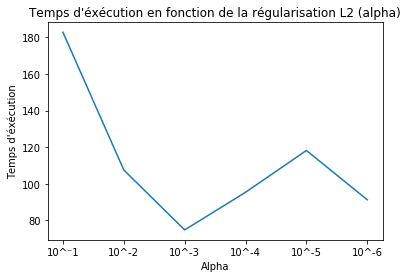

In [10]:
plt.plot(['10^⁻1','10^-2','10^-3','10^-4','10^-5','10^-6'],time_alph)
plt.xlabel("Alpha")
plt.ylabel("Temps d'éxécution")
plt.title("Temps d'éxécution en fonction de la régularisation L2 (alpha)")
plt.show()

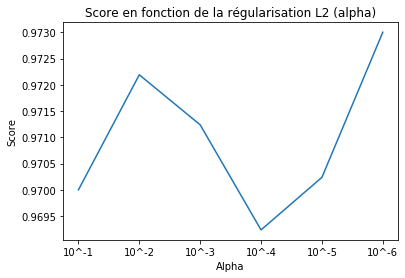

In [11]:
score_alph = [mlp_20_1.score(xtest,ytest),mlp_20_2.score(xtest,ytest),mlp_20_3.score(xtest,ytest),mlp_20_4.score(xtest,ytest),mlp_20_5.score(xtest,ytest),mlp_20_6.score(xtest,ytest)]
plt.plot(['10^-1','10^-2','10^-3','10^-4','10^-5','10^-6'],score_alph)
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Score en fonction de la régularisation L2 (alpha)")
plt.show()

## Choix du modèle avec le meilleur résultat

In [14]:
mlp_best =MLPClassifier(hidden_layer_sizes=(tuple2),solver='adam',activation ='relu',alpha=10**(-6))

temp = time.time()
mlp_best.fit(xtrain,ytrain)                  
time_best=time.time()-temp

print("précision : ", mlp_best.score(xtest,ytest))
print("temps d'execution", time_best)

précision :  0.9691904761904762
temps d'execution 103.70916891098022
